In [1]:
import pandas as pd

raw_data = pd.read_csv('/content/survey_results_public.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [2]:
raw_data.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [3]:
raw_data['DevType']

0                                                      NaN
1                                                      NaN
2        Data scientist or machine learning specialist;...
3                                    Developer, full-stack
4        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73263                                  Developer, back-end
73264        Data scientist or machine learning specialist
73265    Developer, full-stack;Developer, desktop or en...
73266    Developer, front-end;Developer, desktop or ent...
73267    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [4]:
dev_type = raw_data['DevType'].str.split(';')
dev_type

0                                                      NaN
1                                                      NaN
2        [Data scientist or machine learning specialist...
3                                  [Developer, full-stack]
4        [Developer, front-end, Developer, full-stack, ...
                               ...                        
73263                                [Developer, back-end]
73264      [Data scientist or machine learning specialist]
73265    [Developer, full-stack, Developer, desktop or ...
73266    [Developer, front-end, Developer, desktop or e...
73267    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 73268, dtype: object

In [5]:
dev_type.dropna(inplace=True)
dev_type

2        [Data scientist or machine learning specialist...
3                                  [Developer, full-stack]
4        [Developer, front-end, Developer, full-stack, ...
7                         [Developer, full-stack, Student]
8                                    [Developer, back-end]
                               ...                        
73263                                [Developer, back-end]
73264      [Data scientist or machine learning specialist]
73265    [Developer, full-stack, Developer, desktop or ...
73266    [Developer, front-end, Developer, desktop or e...
73267    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 61302, dtype: object

In [6]:
exploded_dev_type = dev_type.explode()
exploded_dev_type

2        Data scientist or machine learning specialist
2                                 Developer, front-end
2                                       Engineer, data
2                           Engineer, site reliability
3                                Developer, full-stack
                             ...                      
73267                         Data or business analyst
73267                                         Designer
73267                                        Scientist
73267                                  Product manager
73267                             System administrator
Name: DevType, Length: 164790, dtype: object

In [7]:
exploded_dev_type.unique()

array(['Data scientist or machine learning specialist',
       'Developer, front-end', 'Engineer, data',
       'Engineer, site reliability', 'Developer, full-stack',
       'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Student', 'Developer, mobile',
       'Educator', 'Engineering manager', 'Database administrator',
       'Academic researcher', 'DevOps specialist',
       'Other (please specify):',
       'Developer, embedded applications or devices',
       'Developer, game or graphics', 'Project manager',
       'Cloud infrastructure engineer', 'Data or business analyst',
       'Designer', 'Scientist', 'Product manager',
       'Senior Executive (C-Suite, VP, etc.)', 'System administrator',
       'Blockchain', 'Marketing or sales professional',
       'Security professional'], dtype=object)

In [8]:
data_analyst_data = raw_data[raw_data['DevType'].isin(['Data scientist or machine learning specialist', 'Data or business analyst'])]
data_analyst_data

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
240,241,I am learning to code,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Friend or family member;Other online resources...,Technical documentation;Blogs;Stack Overflow;O...,Udemy;Codecademy,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
400,401,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","School (i.e., University, College, etc);On the...",NaN,NaN,9,...,30-60 minutes a day,15-30 minutes a day,Just right,Developer portal or other central places to fi...,No,Yes,Yes,Appropriate in length,Neither easy nor difficult,52255.0
463,464,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Stack Overflow,NaN,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,150660.0
1089,1090,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Online books;Video-bas...,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
1704,1705,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,24,...,15-30 minutes a day,60-120 minutes a day,Somewhat long,DevOps function;Continuous integration (CI) an...,Yes,No,No,Appropriate in length,Easy,151992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73053,73054,"I am not primarily a developer, but I write co...","Employed, part-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Programming Games;Writ...,Codecademy,5,...,30-60 minutes a day,30-60 minutes a day,Just right,None of these,Yes,Yes,Yes,Appropriate in length,Easy,58654.0
73054,73055,I am learning to code,"Not employed, but looking for work",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;How-to videos;Ce...,Udemy;Other,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
73064,73065,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Stack Overflow;Online ...,Coursera;Udemy;Pluralsight,14,...,60-120 minutes a day,30-60 minutes a day,Very long,DevOps function;Microservices;Continuous integ...,Yes,Yes,No,Too long,Neither easy nor difficult,NaN
73204,73205,"I am not primarily a developer, but I write co...","Employed, part-time","Hybrid (some remote, some in-person)",Freelance/contract work,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Stack Overflow;Video-b...,Coursera;Udemy,1,...,30-60 minutes a day,30-60 minutes a day,Somewhat long,None of these,Yes,Yes,No,Appropriate in length,Easy,NaN


In [9]:
languages = data_analyst_data['LanguageHaveWorkedWith']
languages

240                   HTML/CSS;Python;Ruby;SQL;VBA
400                      Bash/Shell;C++;Python;SQL
463                          Bash/Shell;Python;SQL
1089                                        Python
1704             Elixir;Python;Rust;SQL;TypeScript
                           ...                    
73053                        PowerShell;Python;SQL
73054                                            R
73064                        Java;Python;Scala;SQL
73204          Bash/Shell;HTML/CSS;Julia;R;SQL;VBA
73264    Bash/Shell;HTML/CSS;JavaScript;Python;SQL
Name: LanguageHaveWorkedWith, Length: 742, dtype: object

In [10]:
languages = languages.str.split(';')
languages

240                   [HTML/CSS, Python, Ruby, SQL, VBA]
400                       [Bash/Shell, C++, Python, SQL]
463                            [Bash/Shell, Python, SQL]
1089                                            [Python]
1704             [Elixir, Python, Rust, SQL, TypeScript]
                              ...                       
73053                          [PowerShell, Python, SQL]
73054                                                [R]
73064                         [Java, Python, Scala, SQL]
73204         [Bash/Shell, HTML/CSS, Julia, R, SQL, VBA]
73264    [Bash/Shell, HTML/CSS, JavaScript, Python, SQL]
Name: LanguageHaveWorkedWith, Length: 742, dtype: object

In [11]:
exploded_languages = languages.explode()
exploded_languages

240        HTML/CSS
240          Python
240            Ruby
240             SQL
240             VBA
            ...    
73264    Bash/Shell
73264      HTML/CSS
73264    JavaScript
73264        Python
73264           SQL
Name: LanguageHaveWorkedWith, Length: 2566, dtype: object

In [12]:
size_by_languages = exploded_languages.groupby(exploded_languages).size()

In [13]:
size_by_languages.sort_values(ascending=False, inplace=True)
size_by_languages

LanguageHaveWorkedWith
Python         624
SQL            440
R              213
Bash/Shell     174
JavaScript     169
HTML/CSS       147
C++            113
Java            85
VBA             70
C               66
C#              50
PowerShell      46
TypeScript      41
MATLAB          41
Julia           39
SAS             33
Scala           29
Go              22
Rust            22
PHP             16
Kotlin          10
Swift           10
Dart             9
Ruby             9
Assembly         8
Lua              8
Haskell          8
LISP             7
Perl             7
Clojure          6
APL              5
Objective-C      5
Groovy           4
Solidity         4
Fortran          3
Delphi           2
F#               2
Elixir           2
Crystal          1
OCaml            1
COBOL            1
Erlang           1
Name: LanguageHaveWorkedWith, dtype: int64

In [14]:
frame = {'language':size_by_languages.index, 'count':size_by_languages.values}

size_by_languages_df = pd.DataFrame(frame)
size_by_languages_df

,language,count
0,Python,624
1,SQL,440
2,R,213
3,Bash/Shell,174
4,JavaScript,169
5,HTML/CSS,147
6,C++,113
7,Java,85
8,VBA,70
9,C,66


# 워드 클라우드와 트리맵

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [16]:
size_by_languages.to_dict()

{'Python': 624,
 'SQL': 440,
 'R': 213,
 'Bash/Shell': 174,
 'JavaScript': 169,
 'HTML/CSS': 147,
 'C++': 113,
 'Java': 85,
 'VBA': 70,
 'C': 66,
 'C#': 50,
 'PowerShell': 46,
 'TypeScript': 41,
 'MATLAB': 41,
 'Julia': 39,
 'SAS': 33,
 'Scala': 29,
 'Go': 22,
 'Rust': 22,
 'PHP': 16,
 'Kotlin': 10,
 'Swift': 10,
 'Dart': 9,
 'Ruby': 9,
 'Assembly': 8,
 'Lua': 8,
 'Haskell': 8,
 'LISP': 7,
 'Perl': 7,
 'Clojure': 6,
 'APL': 5,
 'Objective-C': 5,
 'Groovy': 4,
 'Solidity': 4,
 'Fortran': 3,
 'Delphi': 2,
 'F#': 2,
 'Elixir': 2,
 'Crystal': 1,
 'OCaml': 1,
 'COBOL': 1,
 'Erlang': 1}

In [17]:
wordcloud = WordCloud(background_color = 'white').generate_from_frequencies(size_by_languages.to_dict())
wordcloud

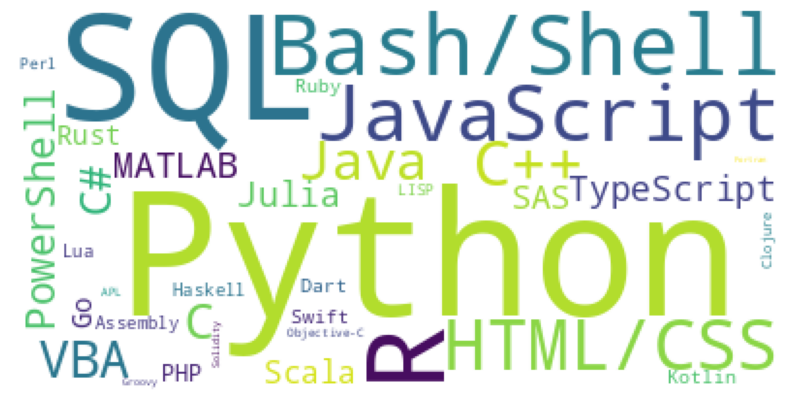

In [18]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
import plotly.express as px

fig = px.treemap(size_by_languages_df, path = ['language'], values = 'count')
fig.show()

# 데이터 학습 및 시각화

In [20]:
languages.dropna(inplace=True)
lang_list = languages.to_list()
lang_list[:10]

[['HTML/CSS', 'Python', 'Ruby', 'SQL', 'VBA'],
 ['Bash/Shell', 'C++', 'Python', 'SQL'],
 ['Bash/Shell', 'Python', 'SQL'],
 ['Python'],
 ['Elixir', 'Python', 'Rust', 'SQL', 'TypeScript'],
 ['Python'],
 ['Bash/Shell',
  'C++',
  'HTML/CSS',
  'JavaScript',
  'Python',
  'Rust',
  'SQL',
  'TypeScript'],
 ['Python', 'SQL'],
 ['Bash/Shell', 'Go', 'HTML/CSS', 'Python'],
 ['Bash/Shell', 'Python', 'Rust']]

In [21]:
target_langs = ['Python', 'R', 'SQL', 'MATLAB', 'Go', 'SAS', 'Scala', 'Julia', 'JavaScript']

In [22]:
revised_lang_list = []

for lang in lang_list:
  filtered = [x for x in lang if x in target_langs]
  revised_lang_list.append(filtered)

revised_lang_list

[['Python', 'SQL'],
 ['Python', 'SQL'],
 ['Python', 'SQL'],
 ['Python'],
 ['Python', 'SQL'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['Python', 'SQL'],
 ['Go', 'Python'],
 ['Python'],
 ['Python'],
 ['Go'],
 ['JavaScript', 'Python'],
 ['Python', 'R', 'SQL'],
 ['Julia', 'Python', 'R'],
 ['Python', 'SQL'],
 ['JavaScript', 'Python'],
 ['Python', 'SQL'],
 ['Julia', 'Python', 'R', 'SQL'],
 ['Python'],
 ['Python', 'R', 'SAS', 'SQL'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['JavaScript', 'Python', 'R', 'SAS', 'SQL'],
 ['Python', 'Scala', 'SQL'],
 ['Python', 'R'],
 ['Python', 'R'],
 ['JavaScript', 'Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Python', 'R', 'SQL'],
 ['JavaScript', 'Python'],
 ['SQL'],
 ['Python', 'R', 'SQL'],
 ['Python', 'SQL'],
 ['Python'],
 ['Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Julia', 'Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['JavaScript', 'Python'],
 ['JavaScript', 'Python'],
 ['Pyt

In [23]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(revised_lang_list).transform(revised_lang_list)
te_ary

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False,  True, ..., False,  True, False],
       [False,  True, False, ..., False,  True, False]])

In [24]:
new_languages = pd. DataFrame(te_ary, columns = te.columns_)
new_languages

,Go,JavaScript,Julia,MATLAB,Python,R,SAS,SQL,Scala
0,False,False,False,False,True,False,False,True,False
1,False,False,False,False,True,False,False,True,False
2,False,False,False,False,True,False,False,True,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...
724,False,False,False,False,True,False,False,True,False
725,False,False,False,False,False,True,False,False,False
726,False,False,False,False,True,False,False,True,True
727,False,False,True,False,False,True,False,True,False


In [25]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(new_languages, min_support = 0.01, use_colnames=True)

In [26]:
freq_items.sort_values(['support'], ascending=False).head(20)

,support,itemsets
4,0.855967,(Python)
7,0.603567,(SQL)
26,0.517147,"(Python, SQL)"
5,0.292181,(R)
24,0.237311,"(Python, R)"
1,0.231824,(JavaScript)
29,0.213992,"(R, SQL)"
14,0.211248,"(JavaScript, Python)"
50,0.182442,"(Python, R, SQL)"
16,0.160494,"(JavaScript, SQL)"


In [27]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x : len(x))
freq_items

,support,itemsets,length
0,0.030178,(Go),1
1,0.231824,(JavaScript),1
2,0.053498,(Julia),1
3,0.056241,(MATLAB),1
4,0.855967,(Python),1
...,...,...,...
58,0.012346,"(JavaScript, Python, Scala, SQL)",4
59,0.017833,"(Julia, Python, R, SQL)",4
60,0.019204,"(MATLAB, Python, R, SQL)",4
61,0.021948,"(Python, R, SAS, SQL)",4


In [28]:
rules = association_rules(freq_items, min_threshold = 0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JavaScript),(Go),0.231824,0.030178,0.013717,0.059172,1.960732,0.006721,1.030817
1,(Go),(JavaScript),0.030178,0.231824,0.013717,0.454545,1.960732,0.006721,1.408322
2,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,0.002975,1.003597
3,(Go),(Python),0.030178,0.855967,0.028807,0.954545,1.115166,0.002975,3.168724
4,(Go),(SQL),0.030178,0.603567,0.017833,0.590909,0.979029,-0.000382,0.969060
...,...,...,...,...,...,...,...,...,...
279,"(R, SQL)","(Python, Scala)",0.213992,0.038409,0.012346,0.057692,1.502060,0.004127,1.020464
280,(Python),"(R, Scala, SQL)",0.855967,0.012346,0.012346,0.014423,1.168269,0.001778,1.002108
281,(Scala),"(Python, R, SQL)",0.039781,0.182442,0.012346,0.310345,1.701063,0.005088,1.185460
282,(SQL),"(Python, Scala, R)",0.603567,0.019204,0.012346,0.020455,1.065097,0.000755,1.001276


In [30]:
fig = px.scatter(
    rules['support'],
    rules['confidence'],
    size = rules['lift'],
    color = rules['lift']
)

fig.update_layout(
    xaxis_title='support',
    yaxis_title = 'confidence',
    font_family = 'Courier New',
    font_color = 'blue',
    title_font_family = 'Times New Roman',
    title_font_color = 'red',
    title = ('Support vs Confidence')
)

fig.show()

In [31]:
rules['antecedents_str'] = rules['antecedents'].apply(lambda x : ','.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x : ','.join(list(x)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_str,consequents_str
0,(JavaScript),(Go),0.231824,0.030178,0.013717,0.059172,1.960732,0.006721,1.030817,JavaScript,Go
1,(Go),(JavaScript),0.030178,0.231824,0.013717,0.454545,1.960732,0.006721,1.408322,Go,JavaScript
2,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,0.002975,1.003597,Python,Go
3,(Go),(Python),0.030178,0.855967,0.028807,0.954545,1.115166,0.002975,3.168724,Go,Python
4,(Go),(SQL),0.030178,0.603567,0.017833,0.590909,0.979029,-0.000382,0.969060,Go,SQL
...,...,...,...,...,...,...,...,...,...,...,...
279,"(R, SQL)","(Python, Scala)",0.213992,0.038409,0.012346,0.057692,1.502060,0.004127,1.020464,"R,SQL","Python,Scala"
280,(Python),"(R, Scala, SQL)",0.855967,0.012346,0.012346,0.014423,1.168269,0.001778,1.002108,Python,"R,Scala,SQL"
281,(Scala),"(Python, R, SQL)",0.039781,0.182442,0.012346,0.310345,1.701063,0.005088,1.185460,Scala,"Python,R,SQL"
282,(SQL),"(Python, Scala, R)",0.603567,0.019204,0.012346,0.020455,1.065097,0.000755,1.001276,SQL,"Python,Scala,R"


In [33]:
fig = px.scatter(
    rules,
    x = 'support',
    y = 'confidence',
    size = 'lift',
    color = 'lift',
    hover_data = ['antecedents_str', 'consequents_str']
)

fig.update_layout(
    xaxis_title = 'spipport',
    yaxis_title = 'confidence',
    font_family = 'Courier New',
    font_color = 'blue',
    title_font_family = 'Times New Roman',
    title_font_color = 'red',
    title = ('Support vs Confidence')
)

fig.show()

In [35]:
rules_for_single = rules[rules.apply(lambda x : (len(x['antecedents'])== 1 and len(x['consequents'])== 1), axis =1)]
rules_for_single

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_str,consequents_str
0,(JavaScript),(Go),0.231824,0.030178,0.013717,0.059172,1.960732,0.006721,1.030817,JavaScript,Go
1,(Go),(JavaScript),0.030178,0.231824,0.013717,0.454545,1.960732,0.006721,1.408322,Go,JavaScript
2,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,0.002975,1.003597,Python,Go
3,(Go),(Python),0.030178,0.855967,0.028807,0.954545,1.115166,0.002975,3.168724,Go,Python
4,(Go),(SQL),0.030178,0.603567,0.017833,0.590909,0.979029,-0.000382,0.969060,Go,SQL
5,(SQL),(Go),0.603567,0.030178,0.017833,0.029545,0.979029,-0.000382,0.999348,SQL,Go
6,(Julia),(JavaScript),0.053498,0.231824,0.012346,0.230769,0.995448,-0.000056,0.998628,Julia,JavaScript
7,(JavaScript),(Julia),0.231824,0.053498,0.012346,0.053254,0.995448,-0.000056,0.999743,JavaScript,Julia
8,(MATLAB),(JavaScript),0.056241,0.231824,0.012346,0.219512,0.946890,-0.000692,0.984225,MATLAB,JavaScript
9,(JavaScript),(MATLAB),0.231824,0.056241,0.012346,0.053254,0.946890,-0.000692,0.996845,JavaScript,MATLAB


In [36]:
rules_for_single_df = pd.DataFrame(rules_for_single['antecedents'].apply(lambda x: list(x)[0]))
rules_for_single_df['consequents'] = rules_for_single['consequents'].apply(lambda x: list(x)[0])
rules_for_single_df['confidence'] = rules_for_single['confidence']
rules_for_single_df

,antecedents,consequents,confidence
0,JavaScript,Go,0.059172
1,Go,JavaScript,0.454545
2,Python,Go,0.033654
3,Go,Python,0.954545
4,Go,SQL,0.590909
5,SQL,Go,0.029545
6,Julia,JavaScript,0.230769
7,JavaScript,Julia,0.053254
8,MATLAB,JavaScript,0.219512
9,JavaScript,MATLAB,0.053254


In [59]:
revised_rules_df = pd.DataFrame(index=target_langs)
for col in target_langs:
  col_conf = []
  for row in target_langs:
    confidence = rules_for_single_df[rules_for_single_df['antecedents'] == row][rules_for_single_df['consequents'] == col]['confidence']

  if len(confidence.values) > 0:
    col_conf.append(confidence.values[0])

  else:
    col_conf.append(0)

  revised_rules_df[col] = col_conf

revised_rules_df

<ipython-input-59-2eb3b20efd0f>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



ValueError: ignored

In [56]:
import seaborn as sns

In [58]:
plt.figure(figsize=(15, 5))
heatmap = sns.heatmap(revised_rules_df, annot=True)

ValueError: ignored

<Figure size 1500x500 with 0 Axes>